<a href="https://colab.research.google.com/github/adalbertii/Modele-klasyfikacyjne/blob/main/digit_recognition_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**# Neuronowy model rozpoznawania odręcznie pisanych cyfr**


In [1]:
!pip install Pillow

In [2]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix

sns.set()
from PIL import Image

In [3]:
# załądowanie danych
# podział na dane treningowe i testowe
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# sprawdzenie rozmiarów stworzonych podzbiorów
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

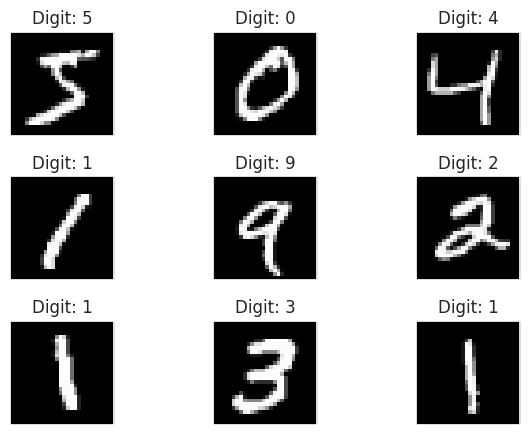

In [7]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

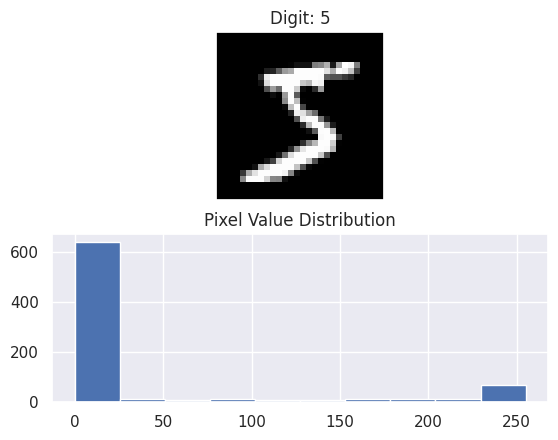

In [8]:
# sprawdzenie rozkładu wartościcheckin value distribution
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [9]:
#sprawdzenie rozkładu unikalnych wartości zmiennej objaśnianej
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [10]:
# kształt zbiorów danych przed procesem "reshape" i normalizacją
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [11]:
# zbudowanie spłaszconego wektora wejściowego sieci neuronowej z tablic 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
print("shape of X_train:", X_train.shape )
print("shape of X_test:", X_test.shape )

shape of X_train: (60000, 784)
shape of X_test: (10000, 784)


In [13]:
# przeskalowanie danych wejściowych
X_train /= 255
X_test /= 255

In [14]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
# wyświetlenie kszatłtu danych wejściowych (treniongowych i tesowych)
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [16]:
# zakodować nasze kategorie - cyfry od 0 do 9 - przy użyciu kodowania one-hot.
# Wynikiem jest wektor o długości równej liczbie kategorii.
#
n_classes = 10
print("Kształt przed kodowaniem 0/1 : ", y_train.shape)

Kształt przed kodowaniem 0/1 :  (60000,)


In [18]:
# kategoryzacja zmiennej objaśnianej
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Kształt danych treningowych (zmiennej objaśnianej) PO kodowaniu 0/1: ", Y_train.shape)
print("Kształt danych testowych (zmiennej objaśnianej) PO kodowaniu 0/1: ", Y_test.shape)

Kształt danych treningowych (zmiennej objaśnianej) PO kodowaniu 0/1:  (60000, 10)
Kształt danych testowych (zmiennej objaśnianej) PO kodowaniu 0/1:  (10000, 10)


In [19]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Step 5 - building neural network

In [20]:
# budowa modelu
# omówić model!!!!
model = Sequential()
model.add(Dense(512, input_shape=(784,))) # input_shape<-----#########
model.add(Activation('relu'))
model.add(Dropout(0.2)) # Dropout<-----#########

model.add(Dense(512))
model.add(Activation('relu')) #relu <-----#########
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax')) #softmax<-----#########

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [ ]:
# zapis topologii modelu do struktury JSON
json_m = model.to_json()
json_m

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_3_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 784], "units": 512, "activation": "linear", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 784]}}, {"module": "keras.layers", "class_name": "Acti

Step 6 - compiling and training model

In [22]:
# lompilacja modelu
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [23]:
# trenowanie modelu i zapis metryk procesu uczenia w zmiennej "history'
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.2490 - accuracy: 0.9251 - val_loss: 0.1016 - val_accuracy: 0.9692
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1024 - accuracy: 0.9684 - val_loss: 0.0832 - val_accuracy: 0.9755
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0740 - accuracy: 0.9768 - val_loss: 0.0755 - val_accuracy: 0.9759
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0580 - accuracy: 0.9813 - val_loss: 0.0668 - val_accuracy: 0.9803
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0453 - accuracy: 0.9854 - val_loss: 0.0613 - val_accuracy: 0.9813
Epoch 6/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0409 - accuracy: 0.9867 - val_loss: 0.0606 - val_accuracy: 0.9830
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0333 - accuracy: 0.9888 - val_loss: 0.0654 - val_accuracy: 0.9822

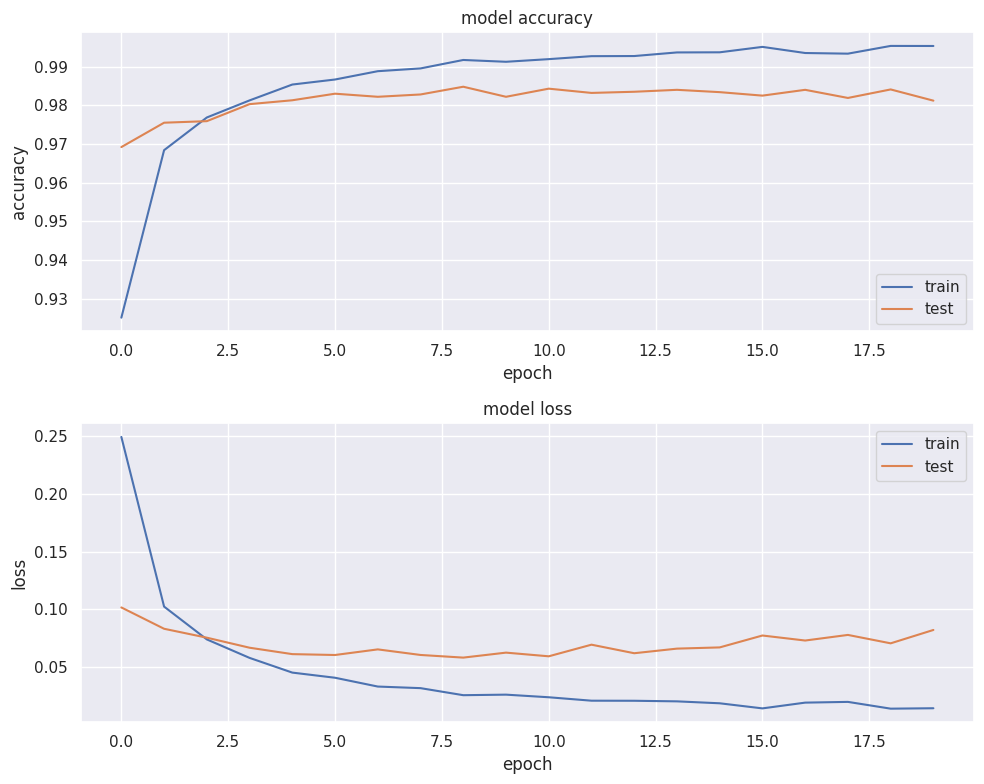

In [25]:
# wykresy przebiegu zmiennej 'accuracy, oraz 'losss
fig = plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [26]:
#predykcja na danych testowych
predicted_classes = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [27]:
np.set_printoptions(precision=5, suppress=True)


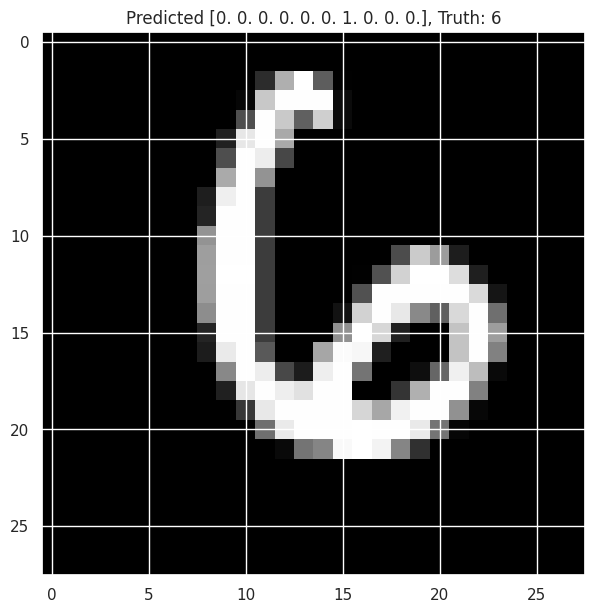

In [56]:
#weryfikacja wyników predykcji dla pojedynczego znaku
#5, 10,20,50

plt.rcParams['figure.figsize'] = (7,14)

figure = plt.figure()
plt.imshow(X_test[88].reshape(28,28), cmap='gray', interpolation='none')
plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[88],
                                       y_test[88]))

figure


In [32]:
# predykcja dla całego zbioru testowego
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [33]:
# sformatowanie tablic na potrzeby "confusion_matrix"
Y_pred_classes =np.argmax(Y_pred, axis=1)
Y_true= np.argmax(Y_test, axis=1)

In [34]:
# Macierz konfuzji
confusion_m= confusion_matrix(Y_true, Y_pred_classes)
print(confusion_m)

[[ 977    1    0    1    0    0    0    1    0    0]
 [   0 1131    0    0    0    0    2    1    1    0]
 [   4    7  995    4    1    0    2   13    5    1]
 [   1    0    1  994    0    4    0    4    3    3]
 [   2    0    2    0  965    0    3    4    0    6]
 [   3    0    0   11    1  870    3    1    3    0]
 [   5    2    1    1    3    3  942    0    1    0]
 [   1    2    3    0    0    0    0 1017    2    3]
 [   5    2    2    4    2    2    1    2  950    4]
 [   2    3    1    6   14    1    0   11    0  971]]


In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_m, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f')
plt.title("Heatmap dla predykcji na danych testowych")
plt.savefig("heatmap.png")
plt.show()

In [36]:
im = Image.open("heatmap.png")
im.show()

In [37]:
# Raport klasyfikacji
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.96      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Precision** - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne

**Recall** - jak wiele obserwacji z wszystkich poytywnych sklasyfikowaliśmy jako pozytywne
